# Exploration

In [153]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

In [162]:
hdf5_path = 'data/dataset.hdf5'
samples = [0,#13
           1,#8
           2,#2
           3,#0
           4,#1
           9,#10
           10,#3
           11,#12
           13,#4
           22,#6
           20,#14
           21,#15
           23,#9
           24,#11
           32,#5
           85#7
          ]

with h5py.File(hdf5_path) as file:
    train_sample = file['train_data'][sample,:,:,:,:]
    hydro_value = file['train_labels'][sample]
    print('> KEYS OF FILE:', list(file.keys()))
    print('> SHAPE OF TRAINING DATA:  ', file['train_data'].shape)

> KEYS OF FILE: ['test_data', 'test_labels', 'train_data', 'train_labels']
> SHAPE OF TRAINING DATA:   (25600, 32, 32, 32, 3)


In [164]:
def twodimheatmap(data,z,c,**kwargs):
    '''
    2D-heatmap in the X,Y-plane of the defined channel and Z-coordinate.
    '''
    data = data[:,:,z,c]
    if 'ax' not in kwargs.keys():
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        ax = kwargs['ax']
        
    ax.set_title('z='+str(z)+',channel='+str(c))
    ax.imshow(data)

def AnalyseSimulation(sample,z,c):
    '''
    Does an entire analysis of a simulation in the z-plane
    '''
    with h5py.File(hdf5_path) as file:
        train_sample = file['train_data'][sample,:,:,:,:]
        hydro_value = file['train_labels'][sample]

        
        print('> HYDRATION LEVEL: ',hydro_value)
        
    print('> VISUALISATION OF DIFFERENT CHANNELS AT DEFINED Z-PLANE')
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
    axes = (ax1,ax2,ax3)
    
    for x,y in enumerate(axes):
        twodimheatmap(train_sample,z,x,ax=y)
    plt.show()
    
    
    print('> DIFFERENCE BETWEEN Z AND Z+1, SAME CHANNEL')
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
    twodimheatmap(train_sample,z,1,ax=ax1)
    twodimheatmap(train_sample,z+1,1,ax=ax2)

    ax3.imshow(np.absolute(np.subtract(train_sample[:,:,z,c],train_sample[:,:,z+1,1])))

    ax1.set_title(str('z='+str(z)+',channel=')+str(c))
    ax2.set_title('z='+str(z+1)+',channel='+str(c))
    ax3.set_title('subtraction & abs. value')

    plt.show()
    
    print('> COUNTING VALUES IN DIFFERENT CHANNELS')
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
    axes = (ax1,ax2,ax3)
    for x,ax in enumerate(axes):
        arr = train_sample[:,:,:,x].flatten()
        minim = arr.min()
        maxim = arr.max()
        ticks = np.linspace(minim,maxim,10)
            
        ax.grid(True)
        ax.set_title('channel '+str(x))
        ax.set_xticks(ticks)
        ax.tick_params(axis ='x', rotation = 45)
        ax.set_xlabel('values')
        ax.set_ylabel('counts')
        ax.hist(arr)
    plt.tight_layout()
    plt.show()

> HYDRATION LEVEL:  8
> VISUALISATION OF DIFFERENT CHANNELS AT DEFINED Z-PLANE


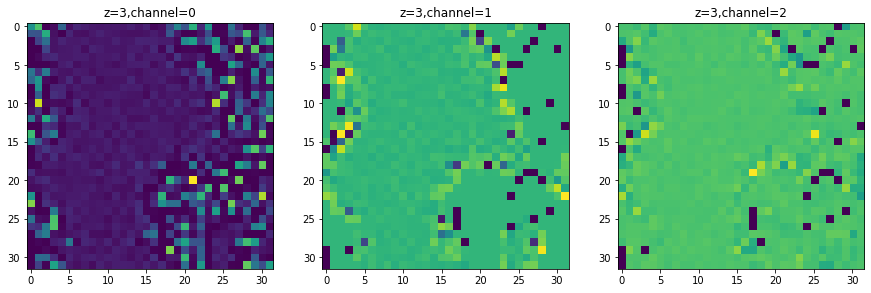

> DIFFERENCE BETWEEN Z AND Z+1, SAME CHANNEL


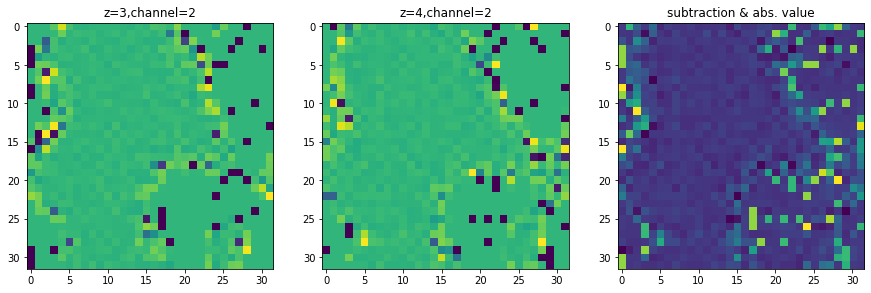

> COUNTING VALUES IN DIFFERENT CHANNELS


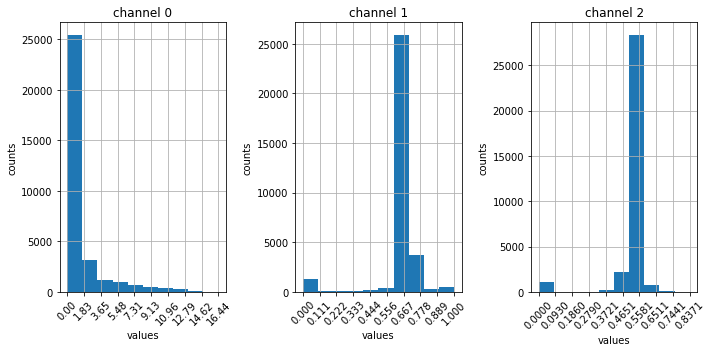

In [165]:
AnalyseSimulation(1000,3,2)